<a href="https://colab.research.google.com/github/bhattacharyyad/Scopus_Data/blob/master/Copy_of_Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

# Load pre-trained MobileNetV2 model + higher level layers
model = MobileNetV2(weights='imagenet')

# Load an image file that contains a cat or dog to test, resizing it to 224x224 pixels (required input size for MobileNetV2)
img_path = '/home/Files/1.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict the image class
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n04209239', 'shower_curtain', np.float32(0.15355076)), ('n01675722', 'banded_gecko', np.float32(0.01676302)), ('n01698640', 'American_alligator', np.float32(0.01658871))]


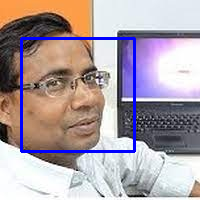

In [5]:
!pip install opencv-python-headless
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow


# Load the pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the image
img = cv2.imread('/home/Files/DB_Photo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the output using cv2_imshow instead of cv2.imshow
cv2_imshow(img) # Use cv2_imshow to display the image

cv2.waitKey(0)
cv2.destroyAllWindows()

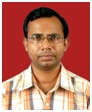

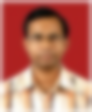

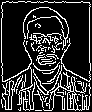

In [4]:
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Read the image
img = cv2.imread('/home/Files/DB_Pic.jpg')

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load image. Please check the file path and ensure the image is valid.")
else:
    # Apply Gaussian Blur
    blurred_img = cv2.GaussianBlur(img, (15, 15), 0)

    # Apply Edge Detection
    edges = cv2.Canny(img, 100, 200)

    # Display the images using cv2_imshow
    cv2_imshow(img)  # Use cv2_imshow instead of cv2.imshow
    cv2_imshow(blurred_img)  # Use cv2_imshow instead of cv2.imshow
    cv2_imshow(edges)  # Use cv2_imshow instead of cv2.imshow
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [8]:
import cv2
import numpy as np

# Download yolov3.weights and yolov3.cfg if they don't exist
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Load image
img = cv2.imread('/home/Files/DB_Photo.jpg')
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Download COCO names file if it doesn't exist
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names

# Load COCO class names
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]


for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]]) # Use classes list here
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 2)

# Use cv2.imshow if running locally (not in a notebook environment like Google Colab)
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

--2025-04-24 09:20:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 172.67.185.199, 104.21.88.156, 2606:4700:3030::ac43:b9c7, ...
Connecting to pjreddie.com (pjreddie.com)|172.67.185.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3.weights’

yolov3.weights          [ <=>                ]   8.67K  --.-KB/s    in 0s      

2025-04-24 09:20:51 (88.0 MB/s) - ‘yolov3.weights’ saved [8879]

--2025-04-24 09:20:51--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s  

error: OpenCV(4.11.0) /io/opencv/modules/dnn/src/darknet/darknet_io.cpp:991: error: (-213:The function/feature is not implemented) Transpose the weights (except for convolutional) is not implemented in function 'ReadDarknetFromWeightsStream'
